In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
ins = pd.read_csv('insurance_part2_data.csv')

In [3]:
ins.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [5]:
print('Shape of Data:', ins.shape)

Shape of Data: (3000, 10)


In [6]:
ins.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [7]:
ins.describe(include='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [8]:
ins.isna().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [9]:
dup = ins.duplicated()
print(dup.sum())
print(ins[dup])

139
      Age Agency_Code           Type Claimed  Commision Channel  Duration  \
63     30         C2B       Airlines     Yes       15.0  Online        27   
329    36         EPX  Travel Agency      No        0.0  Online         5   
407    36         EPX  Travel Agency      No        0.0  Online        11   
411    35         EPX  Travel Agency      No        0.0  Online         2   
422    36         EPX  Travel Agency      No        0.0  Online         5   
...   ...         ...            ...     ...        ...     ...       ...   
2940   36         EPX  Travel Agency      No        0.0  Online         8   
2947   36         EPX  Travel Agency      No        0.0  Online        10   
2952   36         EPX  Travel Agency      No        0.0  Online         2   
2962   36         EPX  Travel Agency      No        0.0  Online         4   
2984   36         EPX  Travel Agency      No        0.0  Online         1   

      Sales       Product Name Destination  
63     60.0        Bronze 

In [10]:
# Remove duplicate rows
print('Number of duplicates present in the data = %d' % dup.sum())
print('Number of rows before discarding duplicates = %d' % (ins.shape[0]))
ins.drop_duplicates(subset = None, keep = 'first', inplace=True)
print('Number of rows after discarding duplicates = %d' % (ins.shape[0]))

Number of duplicates present in the data = 139
Number of rows before discarding duplicates = 3000
Number of rows after discarding duplicates = 2861


In [11]:
ins[dup]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


<AxesSubplot:>

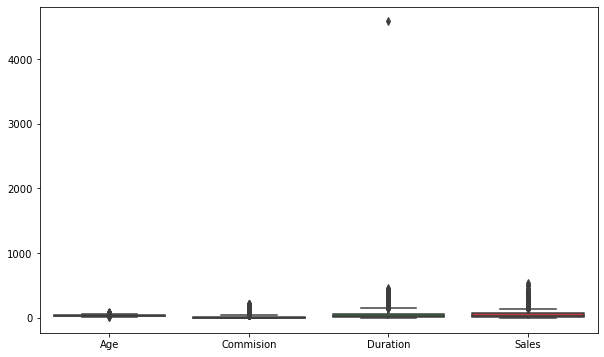

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=ins)

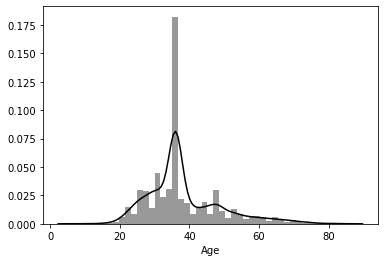

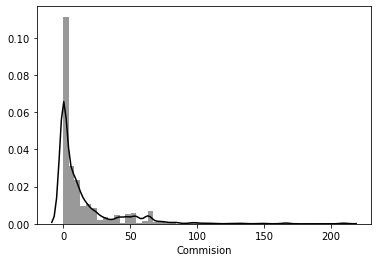

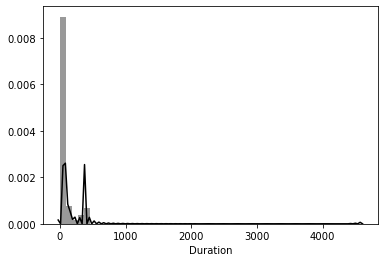

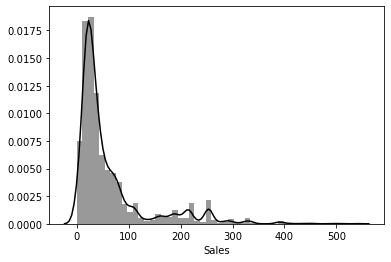

In [13]:
for i in ins[['Age','Commision','Duration','Sales']]:
    plt.figure()
    sns.distplot(ins[i],color='black')

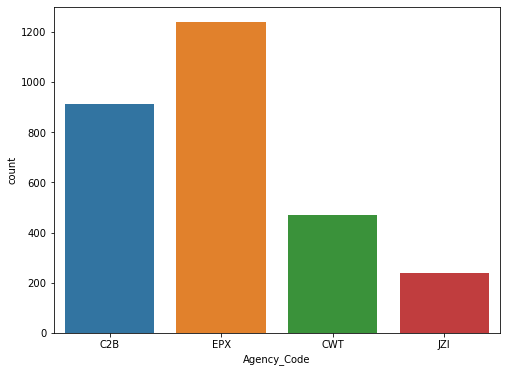

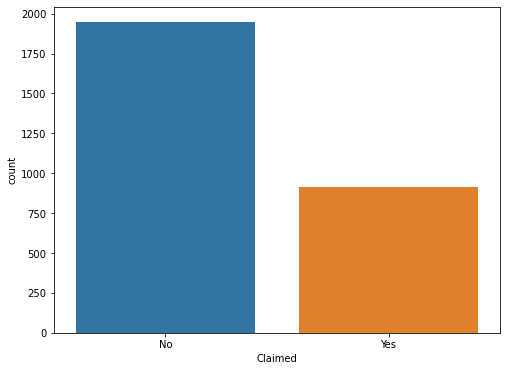

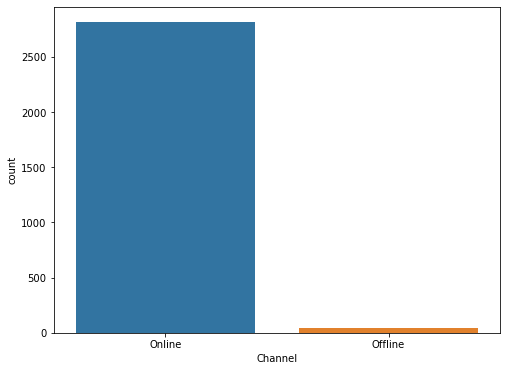

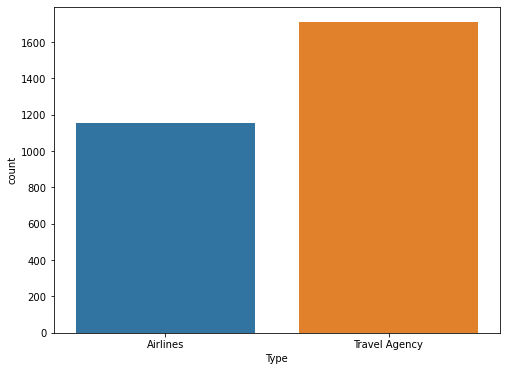

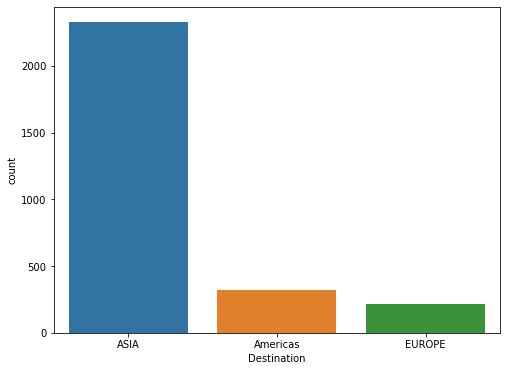

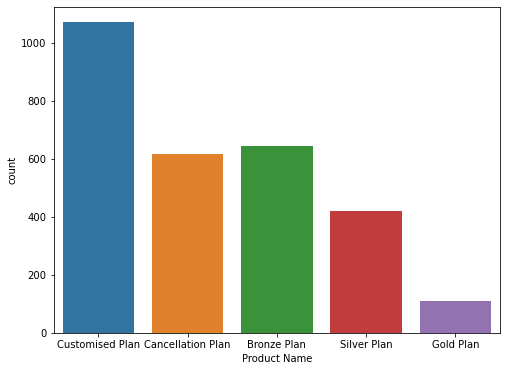

In [14]:
for i in ins[['Agency_Code','Claimed','Channel','Type','Destination','Product Name']]:
    plt.figure(figsize=(8,6))
    sns.countplot(ins[i])

<Figure size 864x576 with 0 Axes>

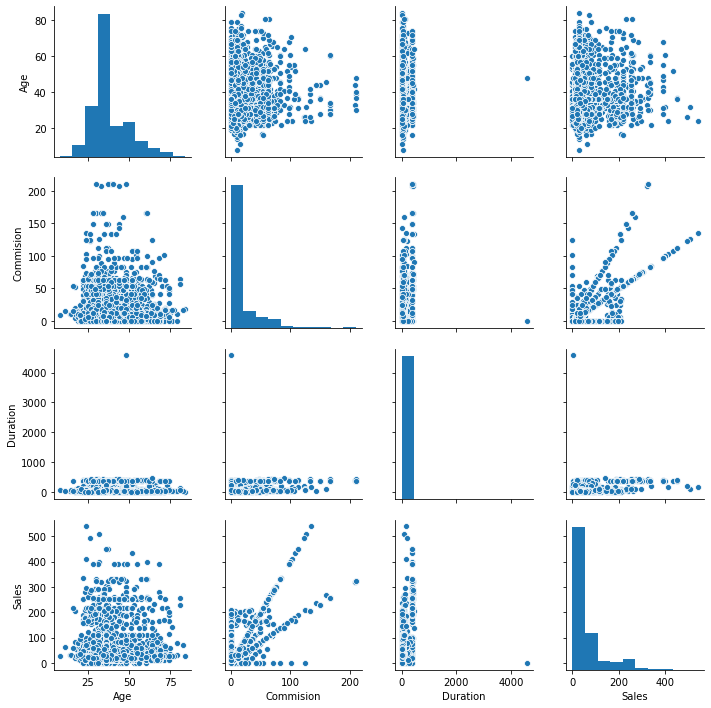

In [15]:
plt.figure(figsize=(12,8))
sns.pairplot(ins)

<AxesSubplot:>

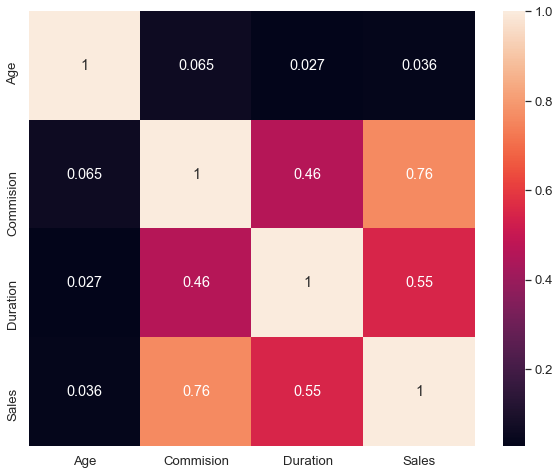

In [16]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(ins[['Age','Commision','Duration','Sales']].corr(),annot=True)

In [17]:
ins_copy = ins.copy(deep=True)
ins_copy.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [18]:
Q1 = ins_copy.quantile(0.25)
Q3 = ins_copy.quantile(0.75)
IQR = Q3 - Q1

In [19]:
ins_copy_out = ins_copy[~((ins_copy < (Q1 - 1.5 * IQR)) |(ins_copy > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
print("Shape of the data without outlier treatment :",ins_copy_out.shape)
print("Shape of the original data  :",ins_copy.shape)

Shape of the data without outlier treatment : (2216, 10)
Shape of the original data  : (2861, 10)


In [20]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)

    return lower_range, upper_range

In [21]:
for feature in ins_copy[['Age','Commision','Duration','Sales']]:
    lr,ur=treat_outlier(ins_copy[feature])
    ins_copy[feature]=np.where(ins_copy[feature]>ur,ur,ins_copy[feature])
    ins_copy[feature]=np.where(ins_copy[feature]<lr,lr,ins_copy[feature])

In [22]:
ins_copy_out1 = ins_copy[~((ins_copy < (Q1 - 1.5 * IQR)) |(ins_copy > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
print(ins_copy_out1.shape,ins_copy.shape)

(2861, 10) (2861, 10)


<AxesSubplot:>

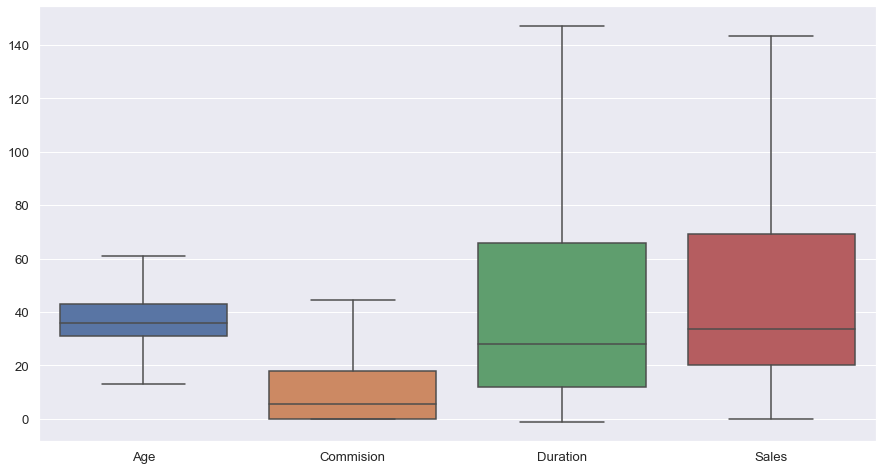

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(data=ins_copy)

### Geting unique counts of all Objects

In [24]:
ins_copy['Agency_Code'].value_counts()

EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64

In [25]:
ins_copy['Type'].value_counts()

Travel Agency    1709
Airlines         1152
Name: Type, dtype: int64

In [26]:
ins_copy['Claimed'].value_counts()

No     1947
Yes     914
Name: Claimed, dtype: int64

In [27]:
ins_copy['Channel'].value_counts()

Online     2815
Offline      46
Name: Channel, dtype: int64

In [28]:
ins_copy['Product Name'].value_counts()

Customised Plan      1071
Bronze Plan           645
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: Product Name, dtype: int64

In [29]:
ins_copy['Destination'].value_counts()

ASIA        2327
Americas     319
EUROPE       215
Name: Destination, dtype: int64

### Converting Object data type into Categorical
Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
The following code loops through each column and checks if the column type is object then converts those columns into  categorical with each distinct value becoming a category or code.

In [30]:
for feature in ins.columns: 
    if ins[feature].dtype == 'object':
        ins[feature] = pd.Categorical(ins[feature]).codes

In [31]:
for feature in ins_copy.columns: 
    if ins_copy[feature].dtype == 'object':
        ins_copy[feature] = pd.Categorical(ins_copy[feature]).codes
        print(ins_copy[feature].value_counts())

2    1238
0     913
1     471
3     239
Name: Agency_Code, dtype: int64
1    1709
0    1152
Name: Type, dtype: int64
0    1947
1     914
Name: Claimed, dtype: int64
1    2815
0      46
Name: Channel, dtype: int64
2    1071
0     645
1     615
4     421
3     109
Name: Product Name, dtype: int64
0    2327
1     319
2     215
Name: Destination, dtype: int64


In [32]:
print("Reading info after coverting object type into categorical \n")
ins_copy.info()

Reading info after coverting object type into categorical 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   float64
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 208.5 KB


In [33]:
ins_copy['Agency_Code'].value_counts()

2    1238
0     913
1     471
3     239
Name: Agency_Code, dtype: int64

In [34]:
ins_copy['Type'].value_counts()

1    1709
0    1152
Name: Type, dtype: int64

In [35]:
ins_copy['Claimed'].value_counts()

0    1947
1     914
Name: Claimed, dtype: int64

In [36]:
ins_copy['Channel'].value_counts()

1    2815
0      46
Name: Channel, dtype: int64

In [37]:
ins_copy['Product Name'].value_counts()

2    1071
0     645
1     615
4     421
3     109
Name: Product Name, dtype: int64

In [38]:
ins_copy['Destination'].value_counts()

0    2327
1     319
2     215
Name: Destination, dtype: int64

In [39]:
ins_copy.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


### Proportion of 1s and 0s in the Target Column

In [40]:
ins_copy['Claimed'].sum() #count of claims as 1

914

In [41]:
# Get the proportion in each class
ins_copy['Claimed'].value_counts(normalize = True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

### Capture the target column into separate vectors for training set and test set

In [42]:
X = ins_copy.drop('Claimed',axis=1)
y = ins_copy['Claimed']

In [43]:
print(X)
print(y)

       Age  Agency_Code  Type  Commision  Channel  Duration   Sales  \
0     48.0            0     0       0.70        1       7.0    2.51   
1     36.0            2     1       0.00        1      34.0   20.00   
2     39.0            1     1       5.94        1       3.0    9.90   
3     36.0            2     1       0.00        1       4.0   26.00   
4     33.0            3     0       6.30        1      53.0   18.00   
...    ...          ...   ...        ...      ...       ...     ...   
2995  28.0            1     1      44.55        1     147.0  143.25   
2996  35.0            0     0      13.50        1       5.0   54.00   
2997  36.0            2     1       0.00        1      54.0   28.00   
2998  34.0            0     0       7.64        1      39.0   30.55   
2999  47.0            3     0      11.55        1      15.0   33.00   

      Product Name  Destination  
0                2            0  
1                2            0  
2                2            1  
3          

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

## Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt = DecisionTreeClassifier(criterion='gini', max_depth = 7,min_samples_leaf=15,min_samples_split=45)

In [48]:
dt.fit(X_train,train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=15, min_samples_split=45)

In [49]:
from sklearn.tree import export_graphviz

In [50]:
insurance_file=open('insurance.dot','w')
test_class_names = ['Yes','No']
dot_tree = export_graphviz(dt, out_file=insurance_file, feature_names=list(X_train),class_names=list(test_class_names))
insurance_file.close()

In [51]:
print (pd.DataFrame(dt.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.485000
Sales         0.264793
Duration      0.099071
Commision     0.049712
Age           0.046382
Product Name  0.038251
Destination   0.016790
Type          0.000000
Channel       0.000000


In [52]:
y_predict = dt.predict(X_test)

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(test_labels, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       588
           1       0.64      0.53      0.58       271

    accuracy                           0.76       859
   macro avg       0.72      0.70      0.70       859
weighted avg       0.75      0.76      0.75       859



In [55]:
y_train_p = dt.predict(X_train)

In [56]:
print(classification_report(train_labels, y_train_p))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1359
           1       0.71      0.57      0.63       643

    accuracy                           0.79      2002
   macro avg       0.76      0.73      0.74      2002
weighted avg       0.78      0.79      0.78      2002



In [189]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 8, 9, 10, 11],
    'min_samples_leaf': [15, 20, 22, 25],
    'min_samples_split': [30, 35, 38, 40, 60, 70]
}

dt_model = DecisionTreeClassifier()

cart_grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [190]:
cart_grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 8, 9, 10, 11],
                         'min_samples_leaf': [15, 20, 22, 25],
                         'min_samples_split': [30, 35, 38, 40, 60, 70]})

In [191]:
cart_grid_search.best_params_

{'max_depth': 8, 'min_samples_leaf': 22, 'min_samples_split': 38}

In [192]:
cart_best_grid = cart_grid_search.best_estimator_
cart_best_grid

DecisionTreeClassifier(max_depth=8, min_samples_leaf=22, min_samples_split=38)

In [193]:
ytrain_predict = cart_best_grid.predict(X_train)
ytest_predict = cart_best_grid.predict(X_test)

In [194]:
ytrain_predict_prob=cart_best_grid.predict_proba(X_train)
ytest_predict_prob=cart_best_grid.predict_proba(X_test)

In [195]:
ytrain_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

## Model Evaluation

### Measuring AUC-ROC Curve

### AUC and ROC for the training data

AUC score on CART for Train Data: 0.845


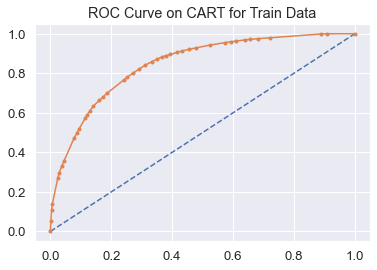

In [196]:
# predict probabilities
probs = cart_best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC score on CART for Train Data: %.3f' % cart_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_train_fpr,cart_train_tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr, marker='.')
plt.title('ROC Curve on CART for Train Data')
# show the plot
plt.show()

### AUC and ROC for the testing data

AUC score on CART for Test Data: 0.768


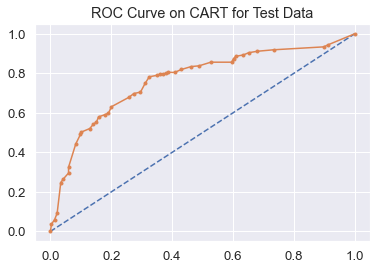

In [197]:
# predict probabilities
probs = cart_best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC score on CART for Test Data: %.3f' % cart_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr, marker='.')
plt.title('ROC Curve on CART for Test Data')
# show the plot
plt.show()

## Confusion Matrix for the training data

In [198]:
from sklearn.metrics import classification_report,confusion_matrix

In [199]:
confusion_matrix(train_labels,ytrain_predict)

array([[1183,  176],
       [ 251,  392]], dtype=int64)

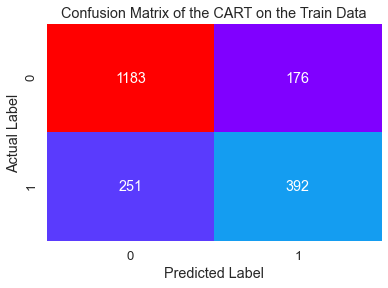

In [200]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of the CART on the Train Data')
plt.show()

In [201]:
cart_best_grid.score(X_train,train_labels)

0.7867132867132867

In [69]:
from sklearn.metrics import accuracy_score

In [108]:
cart_train_acc = round(accuracy_score(train_labels,ytrain_predict),2)
print('Accuracy of CART for Train Data:',cart_train_acc)

Accuracy of CART for Train Data: 0.79


In [71]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1359
           1       0.69      0.61      0.65       643

    accuracy                           0.79      2002
   macro avg       0.76      0.74      0.75      2002
weighted avg       0.78      0.79      0.78      2002



In [72]:
from sklearn.metrics import precision_score,recall_score,f1_score
cart_train_recall = round(recall_score(train_labels, ytrain_predict,pos_label=1,average='binary'),2)
cart_train_precision = round(precision_score(train_labels, ytrain_predict,pos_label=1,average='binary'),2)
cart_train_f1score = round(f1_score(train_labels, ytrain_predict,pos_label=1,average='binary'),2)

## Confusion Matrix for test data

In [202]:
confusion_matrix(test_labels, ytest_predict)

array([[499,  89],
       [121, 150]], dtype=int64)

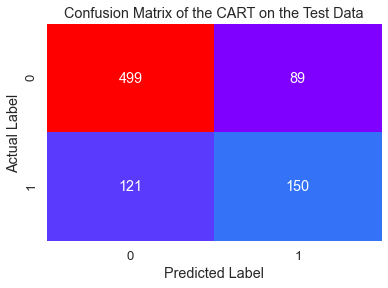

In [203]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of the CART on the Test Data')
plt.show()

In [74]:
cart_best_grid.score(X_test,test_labels)

0.7543655413271245

In [75]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       588
           1       0.62      0.55      0.59       271

    accuracy                           0.75       859
   macro avg       0.71      0.70      0.71       859
weighted avg       0.75      0.75      0.75       859



In [113]:
cart_test_acc = round(accuracy_score(test_labels, ytest_predict),2)
print('Accuracy of CART for Test Data:',cart_test_acc)

Accuracy of CART for Test Data: 0.75


In [77]:
from sklearn.metrics import precision_score,recall_score,f1_score
cart_test_precision = round(precision_score(test_labels, ytest_predict,pos_label=1,average='binary'),2)
cart_test_recall = round(recall_score(test_labels, ytest_predict,pos_label=1,average='binary'),2)
cart_test_f1score = round(f1_score(test_labels, ytest_predict,pos_label=1,average='binary'),2)

In [78]:
print('cart_train_acc :', cart_train_acc)
print('cart_test_acc :',cart_test_acc)
print('cart_train_auc :',cart_train_auc)
print('cart_test_auc :',cart_test_auc)
print('cart_train_recall :',cart_train_recall)
print('cart_test_recall :',cart_test_recall)
print('cart_train_precision :',cart_train_precision)
print('cart_test_precision :',cart_test_precision)
print('cart_train_f1score :',cart_train_f1score)
print('cart_test_f1score :',cart_test_f1score) 

cart_train_acc : 0.79
cart_test_acc : 0.75
cart_train_auc : 0.845412817264547
cart_test_auc : 0.7679073474408213
cart_train_recall : 0.61
cart_test_recall : 0.55
cart_train_precision : 0.69
cart_test_precision : 0.62
cart_train_f1score : 0.65
cart_test_f1score : 0.59


In [79]:
print("Order of Important columns for CART Model: /n")
print (pd.DataFrame(cart_best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

Order of Important columns for CART Model: /n
                   Imp
Agency_Code   0.485652
Sales         0.274068
Duration      0.092939
Commision     0.048249
Age           0.043977
Product Name  0.038303
Destination   0.016813
Type          0.000000
Channel       0.000000


 The columns Type and Channel is showing 0.000 hence they are not used by the Decision Tree hence we can drop them and calculate the Decision Tree model with remaining 8 columns.

In [80]:
from matplotlib import pyplot

In [81]:
cart_Feat_Imp = cart_best_grid.feature_importances_

<BarContainer object of 9 artists>

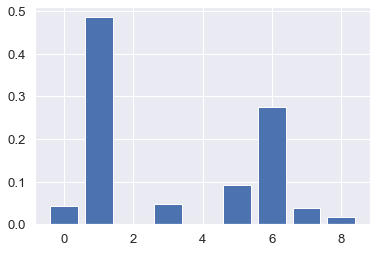

In [82]:
pyplot.bar([x for x in range(len(cart_Feat_Imp))], cart_Feat_Imp)

Text(0, 0.5, 'Importance Level')

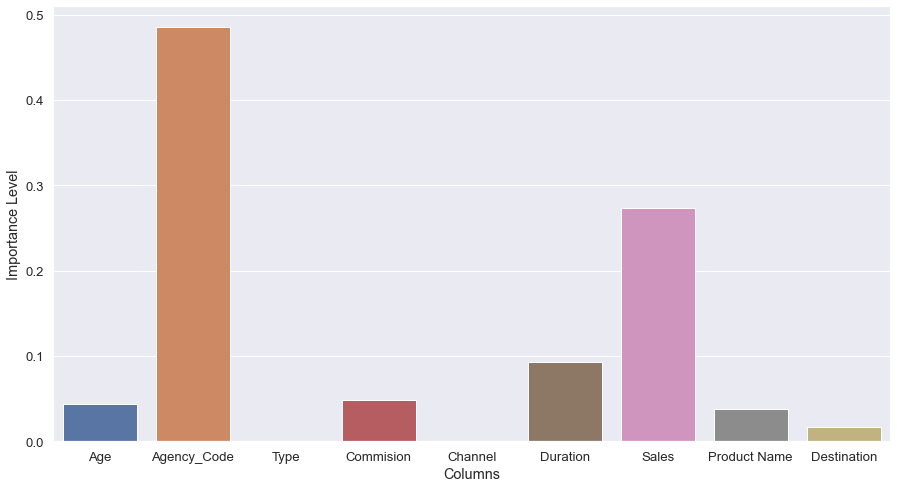

In [83]:
col = X_train.columns
plt.figure(figsize=(15,8))
sns.barplot(x=col, y=cart_Feat_Imp)
plt.xlabel('Columns')
plt.ylabel('Importance Level')

# Ensemble RandomForest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf = RandomForestClassifier(n_estimators=301,max_features = 7,oob_score= True, random_state=1)
rf.fit(X_train,train_labels)

RandomForestClassifier(max_features=7, n_estimators=301, oob_score=True,
                       random_state=1)

In [86]:
print("The Out of Bag score : ",rf.oob_score_)

The Out of Bag score :  0.7322677322677322


#### Predicting Train and Test data with the RF Model

In [87]:
ytrain_predict = rf.predict(X_train)
ytest_predict = rf.predict(X_test)

In [88]:
rf.score(X_train,train_labels)

0.986013986013986

### Evaluating model performance with confusion matrix

### Evaluating model performance on the training data

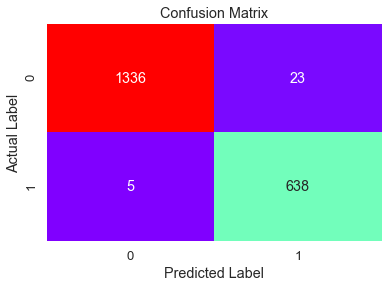

In [89]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [90]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1359
           1       0.97      0.99      0.98       643

    accuracy                           0.99      2002
   macro avg       0.98      0.99      0.98      2002
weighted avg       0.99      0.99      0.99      2002



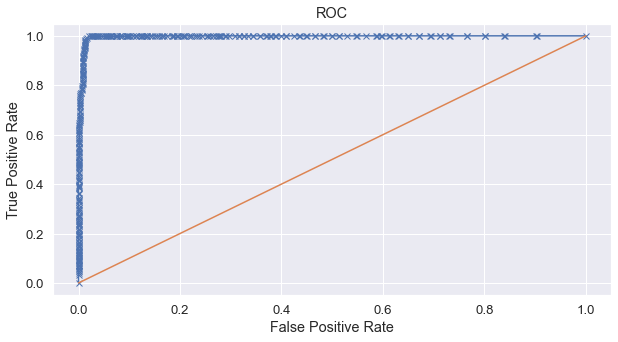

Area under Curve is 0.9970904184647708


In [91]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,rf.predict_proba(X_train)[:,1])
plt.figure(figsize=(10,5))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,rf.predict_proba(X_train)[:,1]))

### Evaluating model performance on the test data

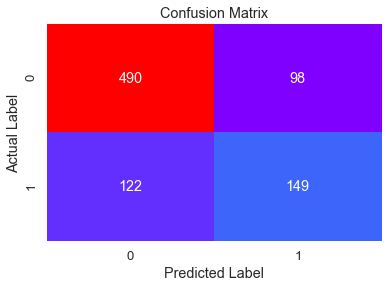

In [92]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [93]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       588
           1       0.60      0.55      0.58       271

    accuracy                           0.74       859
   macro avg       0.70      0.69      0.70       859
weighted avg       0.74      0.74      0.74       859



In [94]:
rf.score(X_test,test_labels)

0.7438882421420256

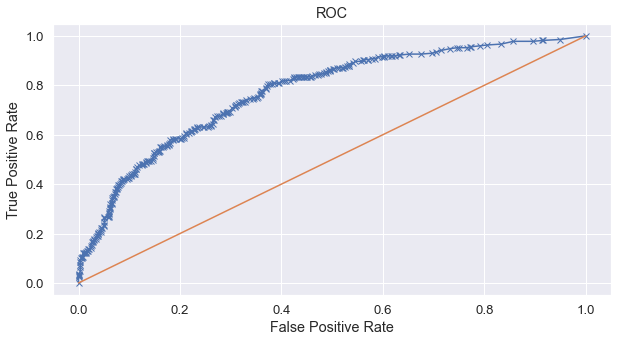

Area under Curve is 0.77393503526872


In [95]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,rf.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,rf.predict_proba(X_test)[:,1]))

## Trying with GridSearchCV for RandomForest

In [114]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [8, 9, 10, 11],
    'max_features': [5, 6, 7],
    'min_samples_leaf': [15, 18, 20],
    'min_samples_split': [45, 50, 60],
    'n_estimators': [101, 301]
}

rfcl = RandomForestClassifier()

rf_grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)



In [115]:
rf_grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9, 10, 11], 'max_features': [5, 6, 7],
                         'min_samples_leaf': [15, 18, 20],
                         'min_samples_split': [45, 50, 60],
                         'n_estimators': [101, 301]})

In [116]:
rf_grid_search.best_params_

{'max_depth': 9,
 'max_features': 6,
 'min_samples_leaf': 15,
 'min_samples_split': 45,
 'n_estimators': 101}

In [117]:
rf_best_grid = rf_grid_search.best_estimator_

In [118]:
ytrain_predict = rf_best_grid.predict(X_train)
ytest_predict = rf_best_grid.predict(X_test)

In [119]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1359
           1       0.73      0.60      0.66       643

    accuracy                           0.80      2002
   macro avg       0.78      0.75      0.76      2002
weighted avg       0.79      0.80      0.79      2002



In [120]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       588
           1       0.70      0.58      0.63       271

    accuracy                           0.79       859
   macro avg       0.76      0.73      0.74       859
weighted avg       0.78      0.79      0.78       859



In [121]:
confusion_matrix(train_labels,ytrain_predict)

array([[1214,  145],
       [ 255,  388]], dtype=int64)

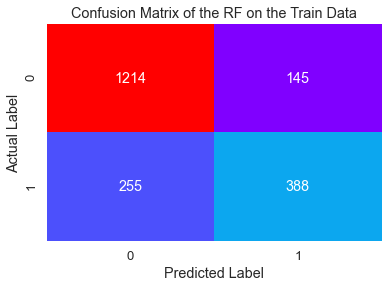

In [122]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of the RF on the Train Data')
plt.show()

In [123]:
confusion_matrix(test_labels,ytest_predict)

array([[521,  67],
       [115, 156]], dtype=int64)

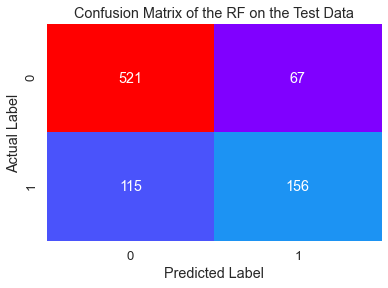

In [125]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of the RF on the Test Data')
plt.show()

In [126]:
rf_best_grid.score(X_train,train_labels)

0.8001998001998002

In [127]:
rf_best_grid.score(X_test,test_labels)

0.7881257275902211

In [128]:
rf_train_acc = round(accuracy_score(train_labels,ytrain_predict),2)
print('Accuracy of RF for Train Data:',rf_train_acc)

Accuracy of RF for Train Data: 0.8


In [129]:
rf_test_acc = round(accuracy_score(test_labels,ytest_predict),2)
print('Accuracy of RF for Test Data:',rf_test_acc)

Accuracy of RF for Test Data: 0.79


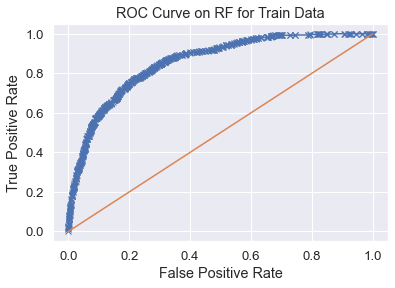

AUC score on RF for Train Data: 0.85767254075989


In [130]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,rf_best_grid.predict_proba(X_train)[:,1])
#plt.figure(figsize=(10,5))
plt.plot(rf_train_fpr,rf_train_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on RF for Train Data')
plt.show()
rf_train_auc = roc_auc_score(train_labels,rf_best_grid.predict_proba(X_train)[:,1])
print('AUC score on RF for Train Data:', rf_train_auc)

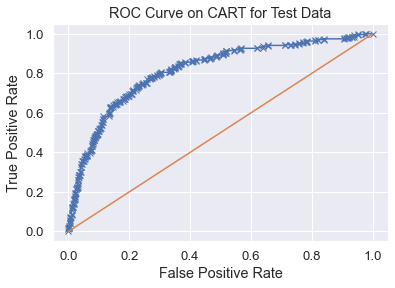

AUC score on RF for Test Data: 0.8157052488892235


In [131]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,rf_best_grid.predict_proba(X_test)[:,1])
#plt.figure(figsize=(10,5))
plt.plot(rf_test_fpr,rf_test_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on RF for Test Data')
plt.show()
rf_test_auc = roc_auc_score(test_labels,rf_best_grid.predict_proba(X_test)[:,1])
print('AUC score on RF for Test Data:', rf_test_auc)

In [132]:
from sklearn.metrics import precision_score,recall_score,f1_score
rf_train_recall = round(recall_score(train_labels,ytrain_predict,pos_label=1,average='binary'),2)
rf_train_precision = round(precision_score(train_labels,ytrain_predict,pos_label=1,average='binary'),2)
rf_train_f1score = round(f1_score(train_labels,ytrain_predict,pos_label=1,average='binary'),2)

In [133]:
from sklearn.metrics import precision_score,recall_score,f1_score
rf_test_recall = round(recall_score(test_labels,ytest_predict,pos_label=1,average='binary'),2)
rf_test_precision = round(precision_score(test_labels,ytest_predict,pos_label=1,average='binary'),2)
rf_test_f1score = round(f1_score(test_labels,ytest_predict,pos_label=1,average='binary'),2)

In [134]:
print('rf_train_acc :', rf_train_acc)
print('rf_test_acc :',rf_test_acc)
print('rf_train_auc :',rf_train_auc)
print('rf_test_auc :',rf_test_auc)
print('rf_train_recall :',rf_train_recall)
print('rf_test_recall :',rf_test_recall)
print('rf_train_precision :',rf_train_precision)
print('rf_test_precision :',rf_test_precision)
print('rf_train_f1score :',rf_train_f1score)
print('rf_test_f1score :',rf_test_f1score) 

rf_train_acc : 0.8
rf_test_acc : 0.79
rf_train_auc : 0.85767254075989
rf_test_auc : 0.8157052488892235
rf_train_recall : 0.6
rf_test_recall : 0.58
rf_train_precision : 0.73
rf_test_precision : 0.7
rf_train_f1score : 0.66
rf_test_f1score : 0.63


In [220]:
rf_Feat_Imp = rf_best_grid.feature_importances_

In [222]:
print (pd.DataFrame(rf_Feat_Imp, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.320964
Product Name  0.207977
Sales         0.195424
Commision     0.097431
Duration      0.090315
Age           0.070402
Destination   0.009861
Type          0.006861
Channel       0.000766


Text(0.5, 1.0, 'Importance of Features in Random Forest')

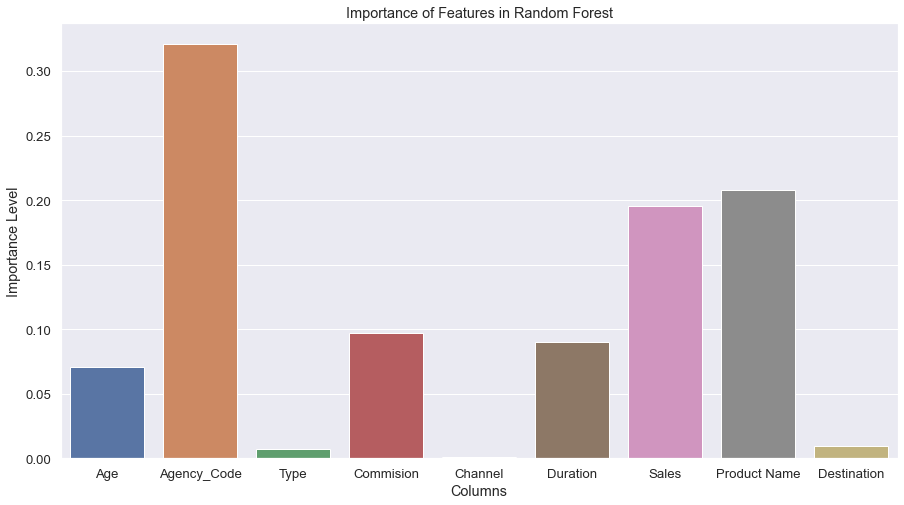

In [221]:
col = X_train.columns
plt.figure(figsize=(15,8))
sns.barplot(x=col, y=rf_Feat_Imp)
plt.xlabel('Columns')
plt.ylabel('Importance Level')
plt.title('Importance of Features in Random Forest')

## MLP Classifier (Artificial Neural Network)

In [135]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [136]:
from sklearn.neural_network import MLPClassifier

In [137]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [138]:
clf.fit(X_trains,train_labels)

Iteration 1, loss = 0.64719552
Iteration 2, loss = 0.63226539
Iteration 3, loss = 0.61608144
Iteration 4, loss = 0.60186285
Iteration 5, loss = 0.58953378
Iteration 6, loss = 0.57912906
Iteration 7, loss = 0.57203613
Iteration 8, loss = 0.56538675
Iteration 9, loss = 0.55797697
Iteration 10, loss = 0.55129080
Iteration 11, loss = 0.54588809
Iteration 12, loss = 0.54149327
Iteration 13, loss = 0.53775456
Iteration 14, loss = 0.53507044
Iteration 15, loss = 0.53281065
Iteration 16, loss = 0.53130139
Iteration 17, loss = 0.52964472
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=21,
              solver='sgd', tol=0.01, verbose=True)

In [139]:
y_train_pred = clf.predict(X_trains)
y_test_pred = clf.predict(X_tests)

### Evaluating model performance on training data

In [140]:
confusion_matrix(train_labels,y_train_pred)

array([[1283,   76],
       [ 451,  192]], dtype=int64)

In [141]:
print(classification_report(train_labels, y_train_pred))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83      1359
           1       0.72      0.30      0.42       643

    accuracy                           0.74      2002
   macro avg       0.73      0.62      0.63      2002
weighted avg       0.73      0.74      0.70      2002



AUC: 0.777


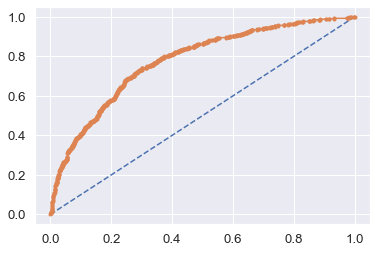

In [142]:
# AUC and ROC for the training data
# predict probabilities
probs = clf.predict_proba(X_trains)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Predicting Test Data and comparing model performance

In [143]:
confusion_matrix(test_labels,y_test_pred)

array([[555,  33],
       [188,  83]], dtype=int64)

In [144]:
print(classification_report(test_labels,y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       588
           1       0.72      0.31      0.43       271

    accuracy                           0.74       859
   macro avg       0.73      0.63      0.63       859
weighted avg       0.74      0.74      0.71       859



AUC: 0.791


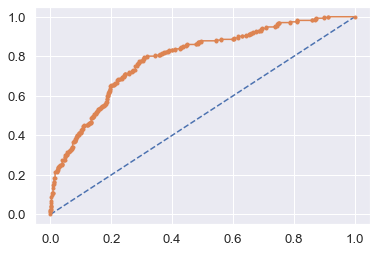

In [145]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(X_tests)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [204]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [100,200,300,500],
    'max_iter': [2500,3000,5000,6000],
    'solver': ['sgd','adam'],
    'tol': [0.01],
}

nncl = MLPClassifier(random_state=1)

ann_grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 5)

In [205]:
ann_grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [100, 200, 300, 500],
                         'max_iter': [2500, 3000, 5000, 6000],
                         'solver': ['sgd', 'adam'], 'tol': [0.01]})

In [206]:
ann_grid_search.best_params_

{'hidden_layer_sizes': 500, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [207]:
ann_best_grid = ann_grid_search.best_estimator_

In [208]:
ytrain_predict = ann_best_grid.predict(X_trains)
ytest_predict = ann_best_grid.predict(X_tests)

In [209]:
confusion_matrix(train_labels,ytrain_predict)

array([[1208,  151],
       [ 322,  321]], dtype=int64)

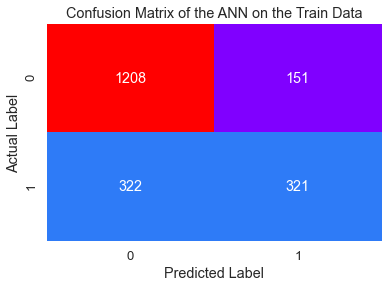

In [210]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of the ANN on the Train Data')
plt.show()

In [211]:
ann_best_grid.score(X_trains,train_labels)

0.7637362637362637

In [212]:
ann_train_acc = round(accuracy_score(train_labels,ytrain_predict),2)
print('Accuracy of ANN for Train Data:',ann_train_acc)

Accuracy of ANN for Train Data: 0.76


In [213]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1359
           1       0.68      0.50      0.58       643

    accuracy                           0.76      2002
   macro avg       0.73      0.69      0.71      2002
weighted avg       0.75      0.76      0.75      2002



In [214]:
from sklearn.metrics import precision_score,recall_score,f1_score
ann_train_recall = round(recall_score(train_labels,ytrain_predict,pos_label=1,average='binary'),2)
ann_train_precision = round(precision_score(train_labels,ytrain_predict,pos_label=1,average='binary'),2)
ann_train_f1score = round(f1_score(train_labels,ytrain_predict,pos_label=1,average='binary'),2)

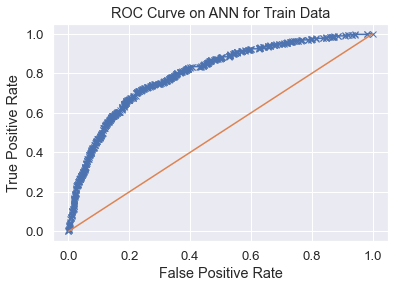

AUC score on ANN for Train Data: 0.8004587812143454


In [215]:
#from sklearn.metrics import roc_curve,roc_auc_score
ann_train_fpr, ann_train_tpr,_=roc_curve(train_labels,ann_best_grid.predict_proba(X_trains)[:,1])
plt.plot(ann_train_fpr,ann_train_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on ANN for Train Data')
plt.show()
ann_train_auc = roc_auc_score(train_labels,ann_best_grid.predict_proba(X_trains)[:,1])
print('AUC score on ANN for Train Data:',ann_train_auc)

In [216]:
ann_best_grid.score(X_tests,test_labels)

0.770663562281723

In [217]:
ann_test_acc = round(accuracy_score(test_labels,ytest_predict),2)
print('Accuracy of ANN for Test Data:',ann_test_acc)

Accuracy of ANN for Test Data: 0.77


In [218]:
confusion_matrix(test_labels,ytest_predict)

array([[528,  60],
       [137, 134]], dtype=int64)

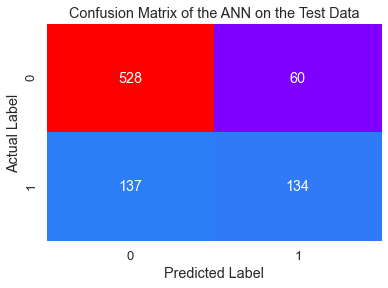

In [219]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of the ANN on the Test Data')
plt.show()

In [160]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       588
           1       0.69      0.49      0.58       271

    accuracy                           0.77       859
   macro avg       0.74      0.70      0.71       859
weighted avg       0.76      0.77      0.76       859



In [161]:
from sklearn.metrics import precision_score,recall_score,f1_score
ann_test_precision = round(precision_score(test_labels,ytest_predict,pos_label=1,average='binary'),2)
ann_test_recall = round(recall_score(test_labels,ytest_predict,pos_label=1,average='binary'),2)
ann_test_f1score = round(f1_score(test_labels,ytest_predict,pos_label=1,average='binary'),2)

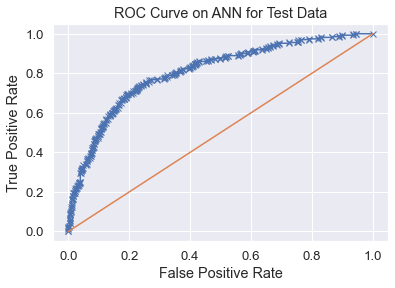

AUC score on ANN for Test Data: 0.8076850666465847


In [162]:
#from sklearn.metrics import roc_curve,roc_auc_score
ann_test_fpr, ann_test_tpr,_=roc_curve(test_labels,ann_best_grid.predict_proba(X_tests)[:,1])
plt.plot(ann_test_fpr,ann_test_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on ANN for Test Data')
plt.show()
ann_test_auc = roc_auc_score(test_labels,ann_best_grid.predict_proba(X_tests)[:,1])
print('AUC score on ANN for Test Data:', ann_test_auc)

In [163]:
print('cart_train_acc :', cart_train_acc)
print('cart_test_acc :',cart_test_acc)
print('cart_train_auc :',cart_train_auc)
print('cart_test_auc :',cart_test_auc)
print('cart_train_recall :',cart_train_recall)
print('cart_test_recall :',cart_test_recall)
print('cart_train_precision :',cart_train_precision)
print('cart_test_precision :',cart_test_precision)
print('cart_train_f1score :',cart_train_f1score)
print('cart_test_f1score :',cart_test_f1score) 

cart_train_acc : 0.79
cart_test_acc : 0.75
cart_train_auc : 0.845412817264547
cart_test_auc : 0.7679073474408213
cart_train_recall : 0.61
cart_test_recall : 0.55
cart_train_precision : 0.69
cart_test_precision : 0.62
cart_train_f1score : 0.65
cart_test_f1score : 0.59


In [164]:
print('rf_train_acc :', rf_train_acc)
print('rf_test_acc :',rf_test_acc)
print('rf_train_auc :',rf_train_auc)
print('rf_test_auc :',rf_test_auc)
print('rf_train_recall :',rf_train_recall)
print('rf_test_recall :',rf_test_recall)
print('rf_train_precision :',rf_train_precision)
print('rf_test_precision :',rf_test_precision)
print('rf_train_f1score :',rf_train_f1score)
print('rf_test_f1score :',rf_test_f1score) 

rf_train_acc : 0.8
rf_test_acc : 0.79
rf_train_auc : 0.85767254075989
rf_test_auc : 0.8157052488892235
rf_train_recall : 0.6
rf_test_recall : 0.58
rf_train_precision : 0.73
rf_test_precision : 0.7
rf_train_f1score : 0.66
rf_test_f1score : 0.63


In [165]:
print('ann_train_acc :', ann_train_acc)
print('ann_test_acc :',ann_test_acc)
print('ann_train_auc :',ann_train_auc)
print('ann_test_auc :',ann_test_auc)
print('ann_train_recall :',ann_train_recall)
print('ann_test_recall :',ann_test_recall)
print('ann_train_precision :',ann_train_precision)
print('ann_test_precision :',ann_test_precision)
print('ann_train_f1score :',ann_train_f1score)
print('ann_test_f1score :',ann_test_f1score) 

ann_train_acc : 0.76
ann_test_acc : 0.77
ann_train_auc : 0.8004587812143454
ann_test_auc : 0.8076850666465847
ann_train_recall : 0.5
ann_test_recall : 0.49
ann_train_precision : 0.68
ann_test_precision : 0.69
ann_train_f1score : 0.58
ann_test_f1score : 0.58


In [166]:
df2 = pd.DataFrame(data = [[cart_train_acc,cart_test_acc,rf_train_acc,rf_test_acc,ann_train_acc,ann_test_acc],
                             [cart_train_auc,cart_test_auc,rf_train_auc,rf_test_auc,ann_train_auc,ann_test_auc], 
                             [cart_train_recall,cart_test_recall,rf_train_recall,rf_test_recall,ann_train_recall,ann_test_recall],
                             [cart_train_precision,cart_test_precision,rf_train_precision,rf_test_precision,ann_train_precision,ann_test_precision],
                             [cart_train_f1score,cart_test_f1score,rf_train_f1score,rf_test_f1score,ann_train_f1score,ann_test_f1score]], 
                   columns=['CART Train', 'CART Test', 'RF Train', 'RF Test', 'ANN Train', 'ANN Test'], 
                   index=['Accuracy','AUC Score','Recall','Precision','F1 Score'])
round(df2,2)

,CART Train,CART Test,RF Train,RF Test,ANN Train,ANN Test
Accuracy,0.79,0.75,0.80,0.79,0.76,0.77
AUC Score,0.85,0.77,0.86,0.82,0.80,0.81
Recall,0.61,0.55,0.60,0.58,0.50,0.49
Precision,0.69,0.62,0.73,0.70,0.68,0.69
F1 Score,0.65,0.59,0.66,0.63,0.58,0.58


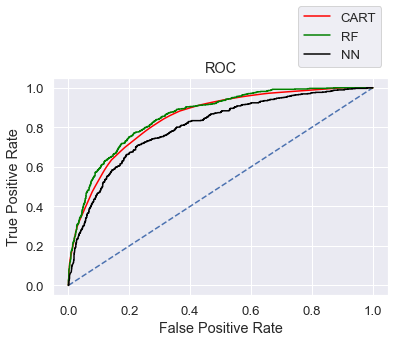

In [167]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(ann_train_fpr,ann_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

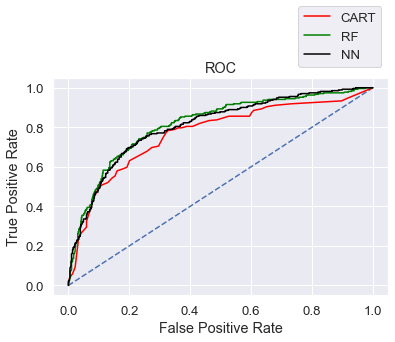

In [168]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(ann_test_fpr,ann_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')